In [1]:
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn import neighbors
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
df = pd.read_csv('books.csv', on_bad_lines = 'warn')
df.head()

Skipping line 3350: expected 12 fields, saw 13
Skipping line 4704: expected 12 fields, saw 13
Skipping line 5879: expected 12 fields, saw 13
Skipping line 8981: expected 12 fields, saw 13



,bookID,title,authors,average_rating,isbn,isbn13,language_code,num_pages,ratings_count,text_reviews_count,publication_date,publisher
0,1,Harry Potter and the Half-Blood Prince (Harry ...,J.K. Rowling/Mary GrandPré,4.57,0439785960,9780439785969,eng,652,2095690,27591,9/16/2006,Scholastic Inc.
1,2,Harry Potter and the Order of the Phoenix (Har...,J.K. Rowling/Mary GrandPré,4.49,0439358078,9780439358071,eng,870,2153167,29221,9/1/2004,Scholastic Inc.
2,4,Harry Potter and the Chamber of Secrets (Harry...,J.K. Rowling,4.42,0439554896,9780439554893,eng,352,6333,244,11/1/2003,Scholastic
3,5,Harry Potter and the Prisoner of Azkaban (Harr...,J.K. Rowling/Mary GrandPré,4.56,043965548X,9780439655484,eng,435,2339585,36325,5/1/2004,Scholastic Inc.
4,8,Harry Potter Boxed Set Books 1-5 (Harry Potte...,J.K. Rowling/Mary GrandPré,4.78,0439682584,9780439682589,eng,2690,41428,164,9/13/2004,Scholastic


In [294]:
#print(df)
print(df.columns)


Index(['bookID', 'title', 'authors', 'average_rating', 'isbn', 'isbn13',
       'language_code', '  num_pages', 'ratings_count', 'text_reviews_count',
       'publication_date', 'publisher'],
      dtype='object')


In [295]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11123 entries, 0 to 11122
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   bookID              11123 non-null  int64  
 1   title               11123 non-null  object 
 2   authors             11123 non-null  object 
 3   average_rating      11123 non-null  float64
 4   isbn                11123 non-null  object 
 5   isbn13              11123 non-null  int64  
 6   language_code       11123 non-null  object 
 7     num_pages         11123 non-null  int64  
 8   ratings_count       11123 non-null  int64  
 9   text_reviews_count  11123 non-null  int64  
 10  publication_date    11123 non-null  object 
 11  publisher           11123 non-null  object 
dtypes: float64(1), int64(5), object(6)
memory usage: 1.0+ MB


In [8]:
#unique_languages = df['language_code'].unique()
#print(unique_languages)


# Data Exploration:
The dataset under consideration comprises comprehensive information about books, including details about authors, ratings, and various other relevant attributes. Having gained a preliminary understanding of the dataset's structure, the next step is to conduct an exploration to identify any missing values. This process involves inspecting the dataset to locate instances where data is absent, providing insights into potential gaps or areas requiring attention. By identifying and handling null values appropriately, we can ensure the integrity of the dataset and enhance the robustness of subsequent analyses.

In [296]:
df.isnull().sum()

bookID                0
title                 0
authors               0
average_rating        0
isbn                  0
isbn13                0
language_code         0
  num_pages           0
ratings_count         0
text_reviews_count    0
publication_date      0
publisher             0
dtype: int64

In [297]:
df.describe()

,bookID,average_rating,isbn13,num_pages,ratings_count,text_reviews_count
count,11123.000000,11123.000000,1.112300e+04,11123.000000,1.112300e+04,11123.000000
mean,21310.856963,3.934075,9.759880e+12,336.405556,1.794285e+04,542.048099
std,13094.727252,0.350485,4.429758e+11,241.152626,1.124992e+05,2576.619589
min,1.000000,0.000000,8.987060e+09,0.000000,0.000000e+00,0.000000
25%,10277.500000,3.770000,9.780345e+12,192.000000,1.040000e+02,9.000000
50%,20287.000000,3.960000,9.780582e+12,299.000000,7.450000e+02,47.000000
75%,32104.500000,4.140000,9.780872e+12,416.000000,5.000500e+03,238.000000
max,45641.000000,5.000000,9.790008e+12,6576.000000,4.597666e+06,94265.000000


The descriptive statistics obtained from df.describe() highlight that our dataset's numerical scores, like average_rating, ratings_count, and text_reviews_count, are within expected ranges (e.g., ratings between 0 and 5). Key insights, such as mean values and data type confirmations, provide a solid understanding of the data's structure. Importantly, the absence of null values ensures the dataset's cleanliness, setting a reliable foundation for subsequent analyses. With this information, we are well-prepared for the next steps in our exploration and analysis.

In [2]:
#Filtering Top Books:
ten_highly_rated = df[df['ratings_count'] > 1000000]
#Sorting by Average Rating:
ten_highly_rated.sort_values(by='average_rating', ascending=False)

,bookID,title,authors,average_rating,isbn,isbn13,language_code,num_pages,ratings_count,text_reviews_count,publication_date,publisher
0,1,Harry Potter and the Half-Blood Prince (Harry ...,J.K. Rowling/Mary GrandPré,4.57,0439785960,9780439785969,eng,652,2095690,27591,9/16/2006,Scholastic Inc.
3,5,Harry Potter and the Prisoner of Azkaban (Harr...,J.K. Rowling/Mary GrandPré,4.56,043965548X,9780439655484,eng,435,2339585,36325,5/1/2004,Scholastic Inc.
1,2,Harry Potter and the Order of the Phoenix (Har...,J.K. Rowling/Mary GrandPré,4.49,0439358078,9780439358071,eng,870,2153167,29221,9/1/2004,Scholastic Inc.
4415,15881,Harry Potter and the Chamber of Secrets (Harry...,J.K. Rowling/Mary GrandPré,4.42,0439064864,9780439064866,eng,341,2293963,34692,6/2/1999,Arthur A. Levine Books / Scholastic Inc.
5270,19063,The Book Thief,Markus Zusak/Cao Xuân Việt Khương,4.37,0375831002,9780375831003,eng,552,1516367,86881,3/14/2006,Alfred A. Knopf
23,34,The Fellowship of the Ring (The Lord of the Ri...,J.R.R. Tolkien,4.36,0618346252,9780618346257,eng,398,2128944,13670,9/5/2003,Houghton Mifflin Harcourt
1697,5907,The Hobbit or There and Back Again,J.R.R. Tolkien,4.27,0618260307,9780618260300,eng,366,2530894,32871,8/15/2002,Houghton Mifflin
7309,28187,The Lightning Thief (Percy Jackson and the Oly...,Rick Riordan,4.25,0786838655,9780786838653,eng,375,1766725,47951,3/1/2006,Disney Hyperion Books
6422,24178,Charlotte's Web,E.B. White/Garth Williams/Rosemary Wells,4.17,0064410935,9780064410939,eng,184,1300470,14739,10/1/2001,HarperCollinsPublishers
1069,3636,The Giver (The Giver #1),Lois Lowry,4.13,0385732554,9780385732550,eng,208,1585589,56604,1/24/2006,Ember


C:\Users\bouka\AppData\Local\Temp\ipykernel_33672\3902821353.py:2: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-whitegrid')


<Axes: xlabel='average_rating', ylabel='title'>

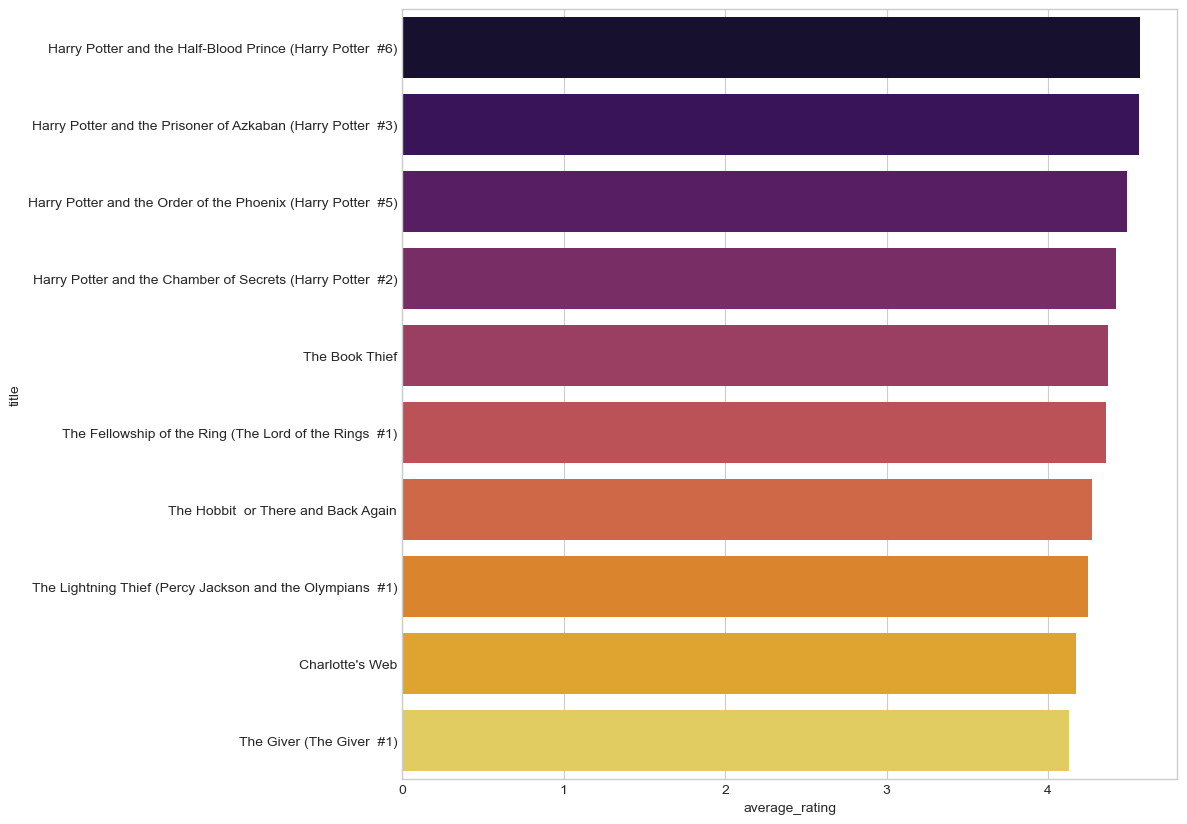

In [299]:
#Plotting average_rating with Seaborn:
plt.style.use('seaborn-whitegrid')
plt.figure(figsize=(10, 10))
data =ten_highly_rated.sort_values(by='average_rating', ascending=False).head(10)
sns.barplot(x="average_rating", y="title", data=data, palette='inferno')


The analysis provided us with insights into the top 10 books in the dataset. Despite the maximum score in the data being 5.0, the displayed results lack books with a perfect score. This absence is intentional, as the selection criteria involved filtering books based on the number of ratings. By setting a threshold for the number of ratings, we aimed to ensure that the showcased books not only possess high ratings but also have a substantial number of reviews. This approach helps mitigate the inclusion of books with very few ratings, where a single perfect score could disproportionately influence the average. Our focus is on books with a broader and more reliable representation of reader sentiment, making the filtering criteria a valuable step in refining our selection of top-rated books.

Explore the leading authors:

Next, we'll explore the leading authors in our dataset, ranking them based on the number of books they've contributed, as long as those books are part of our dataset. This analysis aims to spotlight prolific authors and provide a snapshot of the distribution of authorship within our data.



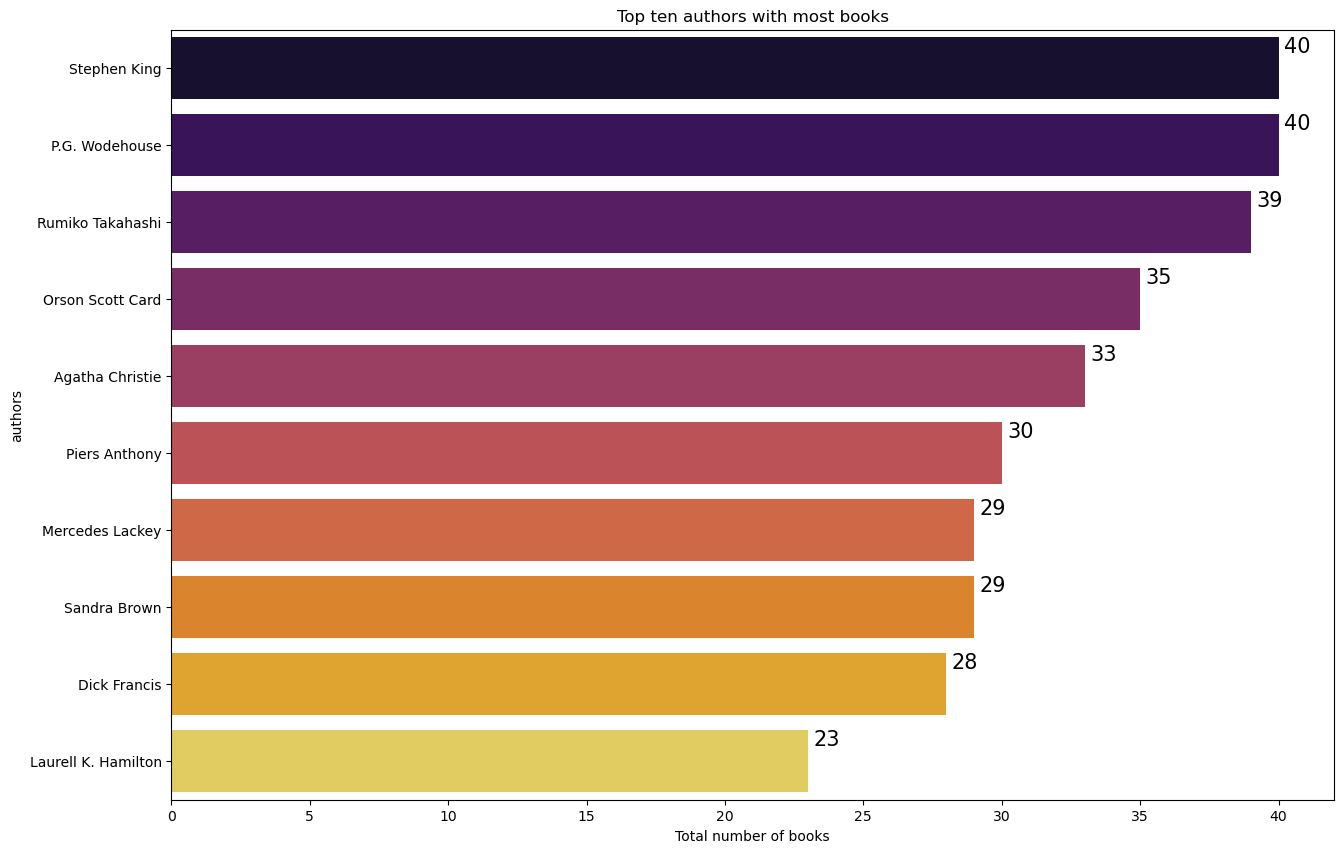

In [3]:
#Grouping by Authors and Counting Books:
top_ten_authors = df.groupby('authors')['title'].count().reset_index().sort_values('title', ascending=False).head(10)
#Plotting with Seaborn and Customizing Plot and Adding Annotations:
plt.figure(figsize=(15,10))
ax = sns.barplot(x='title', y='authors', data=top_ten_authors , palette='inferno')
ax.set_title("Top ten authors with most books")
ax.set_xlabel("Total number of books")
tots_list = []
for i in ax.patches:
    tots_list.append(i.get_width())
tot_list = sum(tots_list)
for i in ax.patches:
    ax.text(i.get_width() + .2, i.get_y() + .2, str(round(i.get_width())), fontsize=15, color='black')
plt.show()


The chart reveals that Stephen King and P.G. Wodehouse top the list with 40 books each in the dataset, closely followed by Rumiko Takahashi and Orson Scott Card.

The most reviewed books:

Now, let's shift our focus to identifying the most reviewed books in our dataset. Leveraging both the average rating column and the count of ratings for each book, we aim to uncover those books that have garnered the highest number of comments or reviews. This analysis provides insights into the level of engagement and discussion surrounding specific books, helping us pinpoint the titles that have left a notable impression on readers.

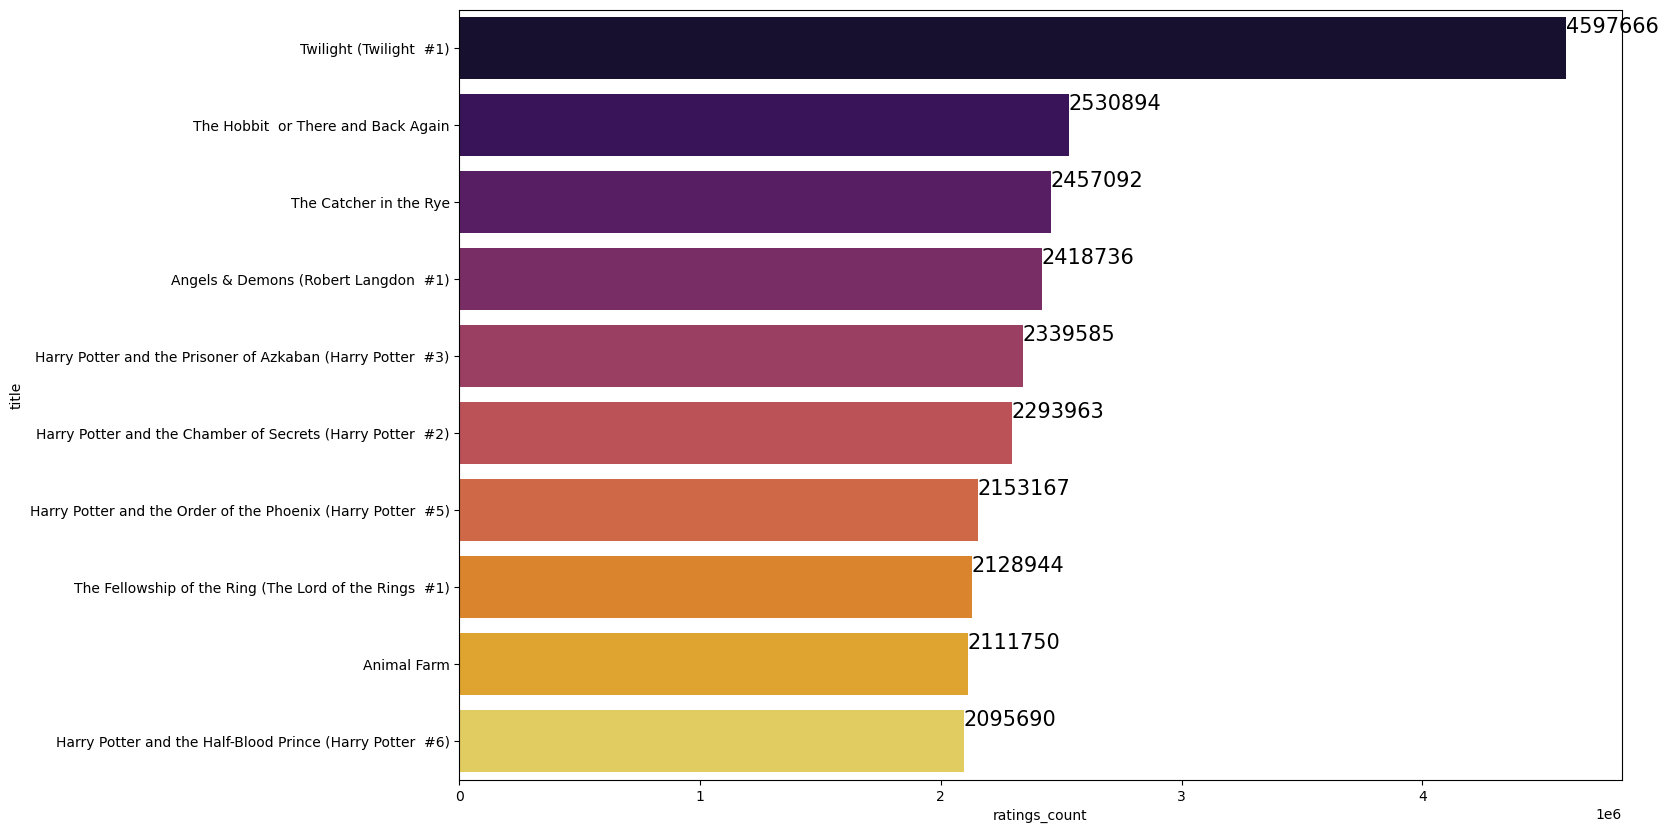

In [4]:
top_rated_books = df.sort_values('ratings_count', ascending=False).head(10).set_index('title')
plt.figure(figsize=(15, 10))
ax = sns.barplot(x=top_rated_books['ratings_count'], y=top_rated_books.index, palette='inferno')
tots = []
for i in ax.patches:
    tots.append(i.get_width())
tot = sum(tots)
for i in ax.patches:
    ax.text(i.get_width() + .2, i.get_y() + .2, str(round(i.get_width())), fontsize=15, color='black')
plt.show()

It's evident that 'Twilight' stands out as the most reviewed book in our dataset, with a staggering count surpassing four million ratings. This overwhelming response places it significantly ahead of other titles. Following closely are 'The Hobbit or There and Back Again' and 'The Catcher in the Rye,' both accumulating impressive review numbers exceeding two million, showcasing their widespread readership and impact.

Relation between our average rating and the number of rating:

Exploring the interplay between average rating and the quantity of ratings is crucial for understanding user preferences and guiding our recommendation system. We aim to uncover patterns by examining how these columns correlate. Additionally, we'll delve into the distribution of average rating concerning factors such as the number of pages in a book, the language used, and the count of text reviews. This comprehensive analysis will contribute insights to refine our recommendation strategies.

C:\Users\bouka\AppData\Local\Temp\ipykernel_40216\838881917.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['average_rating'],ax=ax)
C:\Users\bouka\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


Text(0.5, 0, 'The average rating')

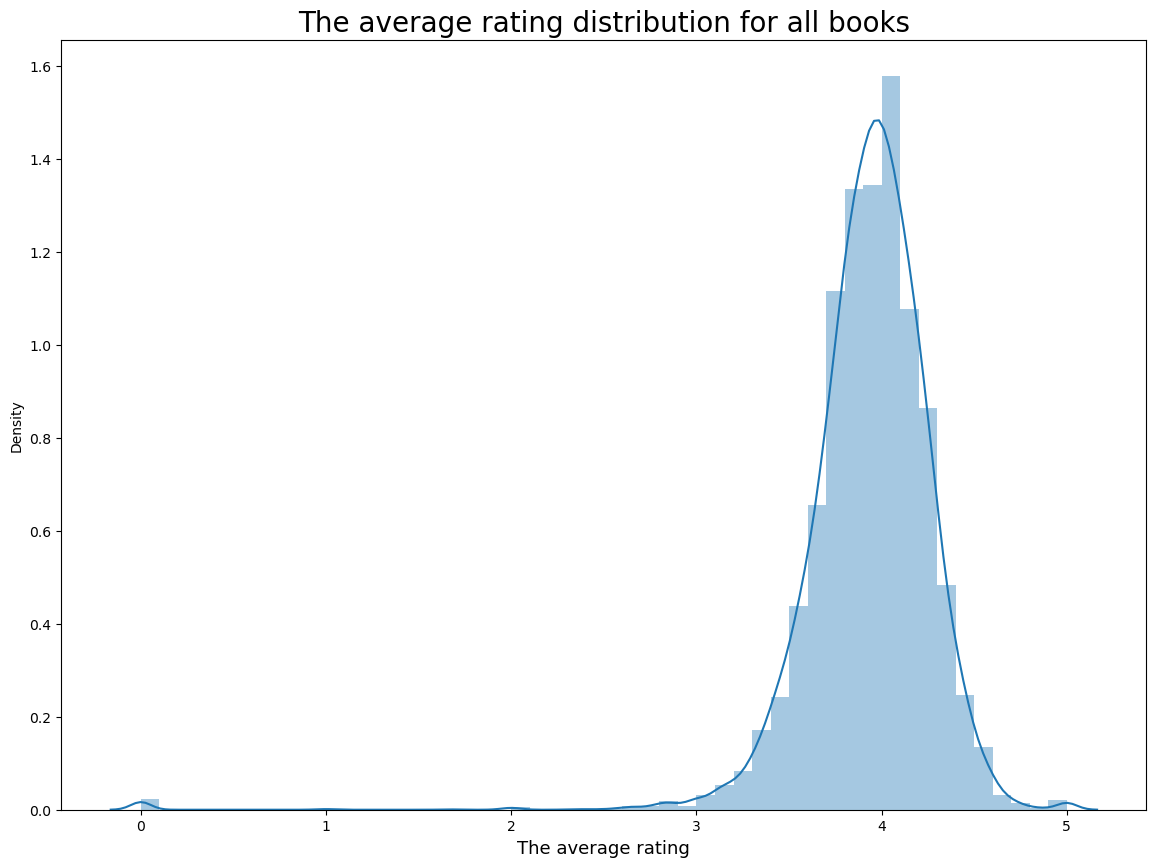

In [5]:
#the average rating distribution for all books 
df.average_rating = df.average_rating.astype(float)
fig, ax = plt.subplots(figsize=[14,10])
sns.distplot(df['average_rating'],ax=ax)
ax.set_title('The average rating distribution for all books',fontsize=20)
ax.set_xlabel('The average rating',fontsize=13)

C:\Users\bouka\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


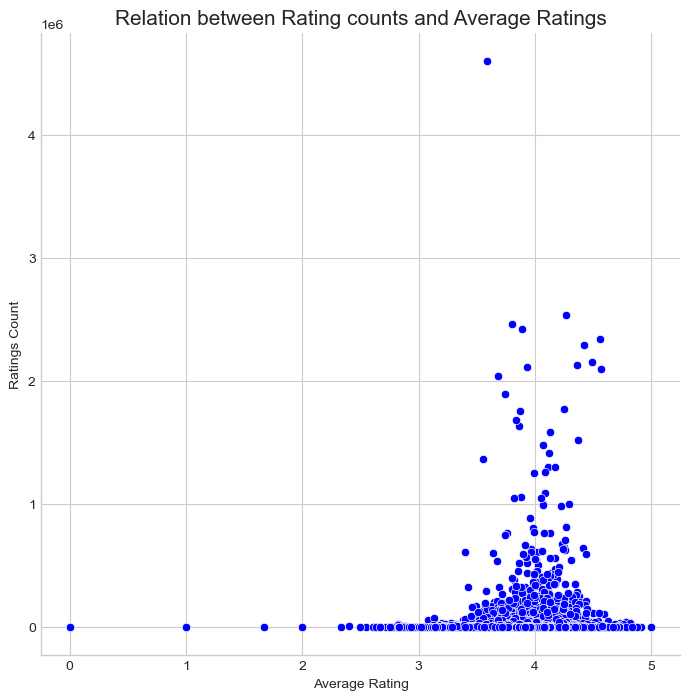

In [16]:
#relation between average ratings and rating counts 
ax = sns.relplot(data=df, x="average_rating", y="ratings_count", color = 'blue', sizes=(100, 200), height=7, marker='o')
plt.title("Relation between Rating counts and Average Ratings",fontsize = 15)
ax.set_axis_labels("Average Rating", "Ratings Count")

C:\Users\bouka\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


<Figure size 1500x1000 with 0 Axes>

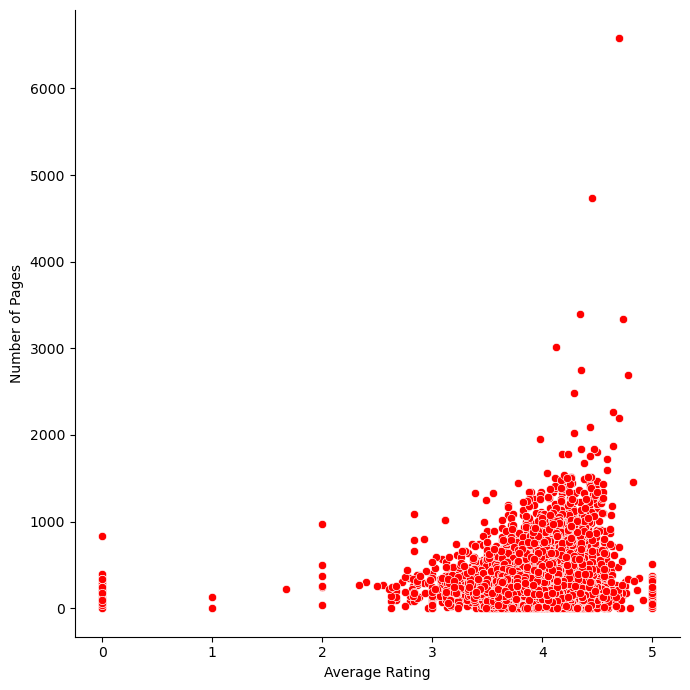

In [6]:
#relatin between average ratings and number of pages:
plt.figure(figsize=(15,10))
ax = sns.relplot(x="average_rating", y="  num_pages", data = df, color = 'red',sizes=(100, 200), height=7, marker='o')
ax.set_axis_labels("Average Rating", "Number of Pages")

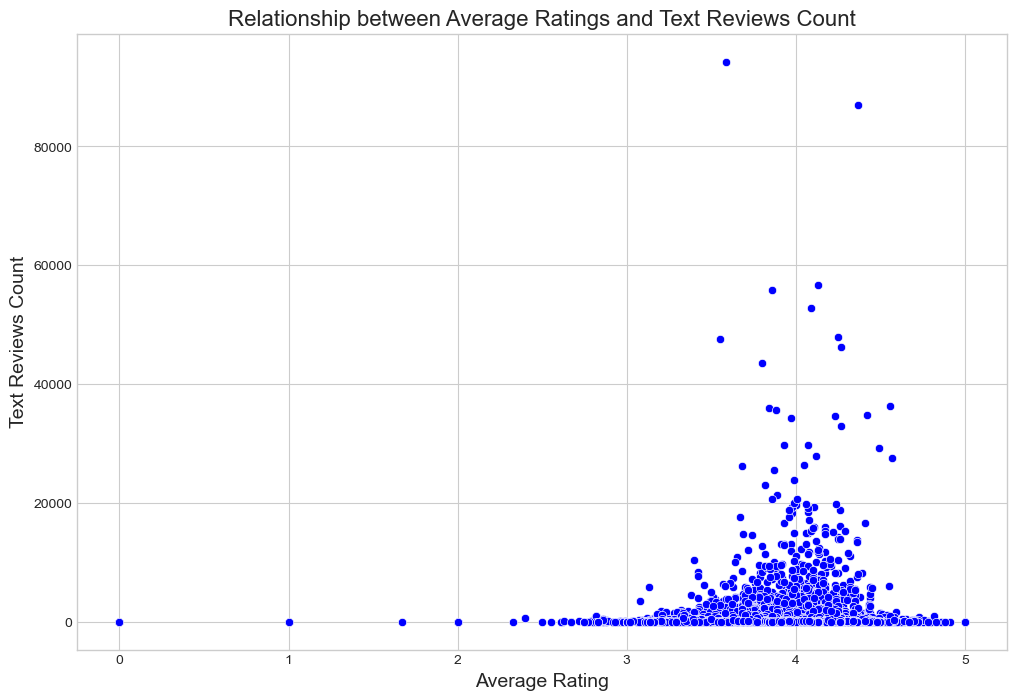

In [304]:
#relation between avrage ratings and number of rewiews
plt.figure(figsize=(12, 8))
sns.scatterplot(x="average_rating", y="text_reviews_count", data=df, color='blue', marker='o')

plt.title('Relationship between Average Ratings and Text Reviews Count', fontsize=16)
plt.xlabel('Average Rating', fontsize=14)
plt.ylabel('Text Reviews Count', fontsize=14)

plt.show()

Following the analysis of average ratings in conjunction with various columns, it appears that language and the count of ratings hold potential for contributing to our recommendation system. However, the remaining columns don't seem to provide substantial insights and including them may not significantly enhance our recommendation algorithm. Therefore, considering efficiency and relevance, we might opt to exclude these less informative columns from further consideration.

In [35]:
df1 = df.copy()

# Data Preparation:
To enhance our model's predictive capabilities, a new column named 'avrage_parts' is being introduced. The 'average_rating' column is being discretized into distinct categories, each representing a range such as 0 to 1, 1 to 2, and so on. By creating this categorical feature, our model gains the ability to better discern patterns within different rating intervals, contributing to more accurate predictions in our system.

In [36]:
df1.loc[ (df1['average_rating'] >= 0) & (df1['average_rating'] <= 1), 'avrage_parts' ] = "between 0 and 1"
df1.loc[ (df1['average_rating'] > 1) & (df1['average_rating'] <= 2), 'avrage_parts' ] = "between 1 and 2"
df1.loc[ (df1['average_rating'] > 2) & (df1['average_rating'] <= 3), 'avrage_parts'] = "between 2 and 3"
df1.loc[ (df1['average_rating'] > 3) & (df1['average_rating'] <= 4), 'avrage_parts'] = "between 3 and 4"
df1.loc[ (df1['average_rating'] > 4) & (df1['average_rating'] <= 5), 'avrage_parts'] = "between 4 and 5"

In [306]:
#print(df1)
#df1.head()
print(df1)

       bookID                                              title  \
0           1  Harry Potter and the Half-Blood Prince (Harry ...   
1           2  Harry Potter and the Order of the Phoenix (Har...   
2           4  Harry Potter and the Chamber of Secrets (Harry...   
3           5  Harry Potter and the Prisoner of Azkaban (Harr...   
4           8  Harry Potter Boxed Set  Books 1-5 (Harry Potte...   
...       ...                                                ...   
11118   45631   Expelled from Eden: A William T. Vollmann Reader   
11119   45633                        You Bright and Risen Angels   
11120   45634                    The Ice-Shirt (Seven Dreams #1)   
11121   45639                                        Poor People   
11122   45641                        Las aventuras de Tom Sawyer   

                                                 authors  average_rating  \
0                             J.K. Rowling/Mary GrandPré            4.57   
1                             J

New dataFrame:

Next, we'll generate two separate DataFrames to capture the distinct categories from the newly formed 'average_parts' column. A binary representation will be implemented, assigning a value of 1 if a book belongs to a specific rating group, such as 4 and 5, and 0 otherwise. Similarly, we will employ a parallel methodology for the 'language_code' column. Each language will be isolated into individual binary columns, with a value of 1 denoting that the book is written in that particular language (e.g., English) and 0 indicating otherwise. This binary encoding facilitates the incorporation of categorical information into analytical models, enabling the model to interpret the presence or absence of specific attributes.

In [37]:
new_avrage_df = pd.get_dummies(df1['avrage_parts'])
new_language_df = pd.get_dummies(df1['language_code'])

Now, we will merge these two DataFrames into a unified one, labeling it as 'attributes.' This DataFrame is set to be the core functionality delivered to the Book Recommendation System with Machine Learning. It encompasses the information from both 'new_avrage_df' and 'new_language_df,' supplemented by key features such as the average rating and the number of ratings. The resulting 'attributes' DataFrame serves as the comprehensive input, furnishing essential data for the Book Recommendation System's machine learning processes.

In [38]:
attributes= pd.concat([new_avrage_df, 
                      new_language_df, 
                      df1['average_rating'], 
                      df1['ratings_count']], axis=1)

In [309]:
#attributes.head()
#print(attributes.info())
#print(attributes.describe())
#print(attributes.shape)
attributes.head(10)

,between 0 and 1,between 1 and 2,between 2 and 3,between 3 and 4,between 4 and 5,ale,ara,en-CA,en-GB,en-US,...,por,rus,spa,srp,swe,tur,wel,zho,average_rating,ratings_count
0,False,False,False,False,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,4.57,2095690
1,False,False,False,False,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,4.49,2153167
2,False,False,False,False,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,4.42,6333
3,False,False,False,False,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,4.56,2339585
4,False,False,False,False,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,4.78,41428
5,False,False,False,True,False,False,False,False,False,True,...,False,False,False,False,False,False,False,False,3.74,19
6,False,False,False,False,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,4.73,28242
7,False,False,False,False,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,4.38,3628
8,False,False,False,False,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,4.38,249558
9,False,False,False,False,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,4.22,4930


In [310]:
print(attributes.columns)
#print(attributes['ara'].head(10))


Index(['between 0 and 1', 'between 1 and 2', 'between 2 and 3',
       'between 3 and 4', 'between 4 and 5', 'ale', 'ara', 'en-CA', 'en-GB',
       'en-US', 'eng', 'enm', 'fre', 'ger', 'gla', 'glg', 'grc', 'ita', 'jpn',
       'lat', 'msa', 'mul', 'nl', 'nor', 'por', 'rus', 'spa', 'srp', 'swe',
       'tur', 'wel', 'zho', 'average_rating', 'ratings_count'],
      dtype='object')


# Split the data into training and testing sets:

Before creating book_model, split your data into training and testing sets. Use the training set to train your model and the testing set to evaluate its performance.

In [39]:
from sklearn.model_selection import train_test_split
X_train, X_test = train_test_split(attributes, test_size=0.2, random_state=42)

# Recommendation System Preparation:
With our consolidated features in the 'attributes' DataFrame, we are poised to enhance the recommendation system's effectiveness. To address potential bias introduced by varying feature scales, we will employ the Min-Max scaler. This scaling operation will normalize the values across different features, ensuring that no single feature disproportionately influences the system. By equalizing the scales through the scaler, the algorithm can effectively discern patterns and recommendations based on a more standardized representation of the data.
The Min-Max scaling is a method used to scale and normalize the features of a dataset to a specific range, usually between 0 and 1. This transformation is performed independently on each feature, and it's particularly useful when features have different ranges, and you want to bring them to a common scale.

In [40]:
from sklearn.preprocessing import MinMaxScaler
min_max_scaler = MinMaxScaler()
X_train_scaled = min_max_scaler.fit_transform(X_train)
X_test_scaled = min_max_scaler.transform(X_test)

Feature-Ready Book Recommendation System:

Now armed with the refined and normalized feature set encapsulated in the 'attributes' DataFrame, we are poised to construct a robust Book Recommendation System. These features, encompassing a variety of factors such as rating categories, language codes, average rating, and ratings count, have been meticulously prepared to eliminate biases and standardize their scales. With this comprehensive feature representation, we are set to deploy the K-Nearest Neighbors (KNN) algorithm. KNN will leverage the intrinsic similarities between books to generate precise and tailored recommendations. The 'attributes' DataFrame stands as the backbone of our system, enabling a sophisticated analysis that facilitates the delivery of personalized book suggestions to users.

In [41]:

book_model = neighbors.NearestNeighbors(n_neighbors=6, algorithm='ball_tree')
book_model.fit(X_train_scaled)
dist, idlist = book_model.kneighbors(X_test_scaled)
#print("Distances:", dist)
#print("Indices of Nearest Neighbors:", idlist)

We've constructed a machine learning model designed to provide book recommendations, and the next step involves developing a Python function to operationalize this system. When invoked, this function will require the input of a book's name. Subsequently, the model will leverage its learned features to identify books with similar characteristics. The recommended book names will be accumulated in a list, and this list will be returned as the final output of the function. This function serves as the interface for users to seamlessly obtain personalized book suggestions based on the inputted book name.

In [42]:
def BestBook(book_name):
    book_list = []
    book_id = df1[df1['title'] == book_name].index
    book_id = book_id[0]
    for newid in idlist[book_id]:
        book_list.append(df1.loc[newid].title)
    return book_list

BookRecommended = BestBook("The Black Tulip")
BookRecommended

['Some Ether',
 'The Histories',
 "Richard Matheson's Hell House  Book 1",
 "Swann's Way (In Search of Lost Time  #1)",
 'Crime and Punishment',
 "Sky's Pride and Joy (Bachelor Gulch #8)"]

In [45]:
recommended_books_details = df1[df1['title'].isin(BookRecommended)]
recommended_books_details.head(10)
# much books with the same title 

,bookID,title,authors,average_rating,isbn,isbn13,language_code,num_pages,ratings_count,text_reviews_count,publication_date,publisher,avrage_parts
395,1362,The Histories,Herodotus/Aubrey de Sélincourt/John M. Marincola,3.99,0140449086,9780140449082,eng,716,34727,597,1/30/2003,Penguin Books,between 3 and 4
396,1363,The Histories,Herodotus/Aubrey de Sélincourt/John M. Marincola,3.99,0140446389,9780140446388,eng,622,227,18,9/1/1954,Penguin Classics,between 3 and 4
398,1365,The Histories,Herodotus/Carolyn Dewald/Robin Waterfield,3.99,0192824252,9780192824257,eng,772,271,41,11/19/1998,Oxford University Press,between 3 and 4
399,1366,The Histories,Herodotus/Aubrey de Sélincourt/Andrew Robert Burn,3.99,0140440348,9780140440348,en-US,653,143,17,8/30/1970,Penguin Classics,between 3 and 4
400,1367,The Histories,Herodotus/Jennifer Tolbert Roberts/Walter Blanco,3.99,0393959465,9780393959468,en-US,464,40,5,1/17/1992,W.W. Norton & Company,between 3 and 4
401,1368,The Histories,Herodotus/Edward Henry Blakeney/George Rawlins...,3.99,0375400613,9780375400612,en-US,816,132,10,3/25/1997,Everyman's Library 234,between 3 and 4
1991,7138,Crime and Punishment,Fyodor Dostoyevsky/Leonard Stanton/James D. Ha...,4.21,0451530063,9780451530066,en-US,560,2041,183,3/7/2006,Signet,between 4 and 5
1996,7144,Crime and Punishment,Fyodor Dostoyevsky/David McDuff,4.21,0143058142,9780143058144,eng,671,483122,10265,12/31/2002,Penguin,between 4 and 5
2050,7393,Sky's Pride and Joy (Bachelor Gulch #8),Sandra Steffen,3.33,0373194862,9780373194865,eng,192,3,0,11/24/2000,Silhouette Romance,between 3 and 4
3500,12749,Swann's Way (In Search of Lost Time #1),Marcel Proust/Lydia Davis,4.14,0142437964,9780142437964,eng,492,30493,1767,11/30/2004,Penguin Classics,between 4 and 5


In [19]:
book_title = 'The Black Tulip'   
book_details_df1 = df1[df1['title'] == book_title]
book_details_df1.head(1)

,bookID,title,authors,average_rating,isbn,isbn13,language_code,num_pages,ratings_count,text_reviews_count,publication_date,publisher,avrage_parts
2000,7182,The Black Tulip,Alexandre Dumas/Robin Buss,3.8,0140448926,9780140448924,eng,246,10208,598,4/24/2003,Penguin Classics,between 3 and 4


In [292]:
#len(df1)
#book_title_at_index = df1.loc[ 200, 'title']
#print(book_title_at_index)

The Red Notebook: True Stories


# Examin the best number of neighbors:

The purpose is to observe how the choice of the number of neighbors affects the model's performance, as indicated by the chosen performance metric . The goal is often to find an optimal number of neighbors that balances bias and variance in the model.

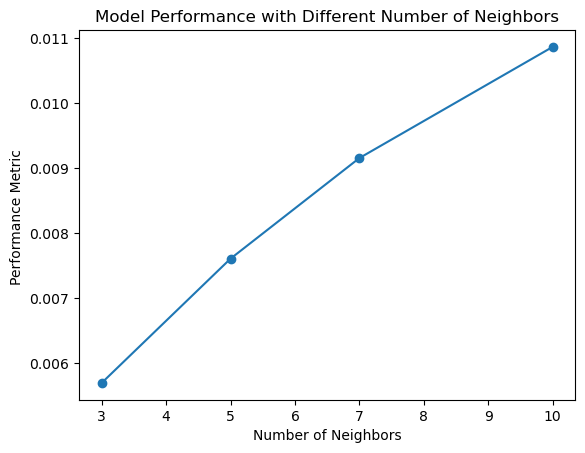

In [20]:
import numpy as np
from sklearn.metrics import mean_squared_error
neighbor_values = [3, 5,7 ,10]
performance_scores = []
for n in neighbor_values:
    book_model = neighbors.NearestNeighbors(n_neighbors=n, algorithm='ball_tree')
    book_model.fit(X_train_scaled)
   
    dist, idlist = book_model.kneighbors(X_test_scaled)
 
    performance_metric = np.mean(dist)
    performance_scores.append(performance_metric)

plt.plot(neighbor_values, performance_scores, marker='o')
plt.xlabel('Number of Neighbors')
plt.ylabel('Performance Metric ')
plt.title('Model Performance with Different Number of Neighbors')
plt.show()

for evaluate the performance of a k-nearest neighbors (KNN) model with different values of the n_neighbors hyperparameter. The script iterates over a set of specified n_neighbors values, fits a KNN model to the training data with each value, and then evaluates the model on a test set. The performance metric, in this case, is the mean distance (dist) between the test set points and their respective nearest neighbors. The results are plotted, showing how the performance metric changes with varying numbers of neighbors.

 Fine-tune the hyperparameters of a k-nearest neighbors (KNN) model using GridSearchCV:

In [21]:
from sklearn.model_selection import GridSearchCV
param_grid = {'n_neighbors': [3, 5, 7, 10], 'algorithm': ['ball_tree', 'kd_tree']}
book_model = neighbors.NearestNeighbors()

grid_search = GridSearchCV(book_model, param_grid, scoring='neg_mean_squared_error', cv=5)
grid_search.fit(X_train_scaled)
best_params = grid_search.best_params_

C:\Users\bouka\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:824: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\bouka\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 811, in _score
    scores = scorer(estimator, X_test)
             ^^^^^^^^^^^^^^^^^^^^^^^^^
TypeError: _BaseScorer.__call__() missing 1 required positional argument: 'y_true'

  warnings.warn(
C:\Users\bouka\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:824: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\bouka\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 811, in _score
    scores = scorer(estimator, X_test)
             ^^^^^^^^^^^^^^^^^^^^^^^^^
TypeError: _BaseScorer.__call__() mis

C:\Users\bouka\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:824: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\bouka\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 811, in _score
    scores = scorer(estimator, X_test)
             ^^^^^^^^^^^^^^^^^^^^^^^^^
TypeError: _BaseScorer.__call__() missing 1 required positional argument: 'y_true'

  warnings.warn(
C:\Users\bouka\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:824: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\bouka\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 811, in _score
    scores = scorer(estimator, X_test)
             ^^^^^^^^^^^^^^^^^^^^^^^^^
TypeError: _BaseScorer.__call__() mis

C:\Users\bouka\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:824: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\bouka\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 811, in _score
    scores = scorer(estimator, X_test)
             ^^^^^^^^^^^^^^^^^^^^^^^^^
TypeError: _BaseScorer.__call__() missing 1 required positional argument: 'y_true'

  warnings.warn(
C:\Users\bouka\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:824: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\bouka\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 811, in _score
    scores = scorer(estimator, X_test)
             ^^^^^^^^^^^^^^^^^^^^^^^^^
TypeError: _BaseScorer.__call__() mis

In [23]:
final_model = neighbors.NearestNeighbors(**best_params)
final_model.fit(X_train_scaled)
dist, idlist = final_model.kneighbors(X_test_scaled)
performance_metric = np.mean(dist)
best_neighbors = best_params['n_neighbors']
print(f"Best Number of Neighbors: {best_neighbors}")
print(f"Performance Metric on Test Set: {performance_metric}")

Best Number of Neighbors: 3
Performance Metric on Test Set: 0.005697850693924451


The corresponding performance metric on the test set, measured by mean squared error (MSE), is 0.0057. Lower values of MSE generally indicate better model performance, so the KNN model with 3 neighbors appears to provide a good fit to the data. It's important to interpret these results in the context of the specific problem and dataset being analyzed.

In [27]:
df3 = df.copy()

In [46]:
#print(df3)

# Random Forest 

Random Forest model, and a Nearest Neighbors algorithm to recommend books similar to a selected one based on its features. The process involves data preparation, model training, feature transformation, finding similar books using Nearest Neighbors, and printing the recommendations with additional details.


In the process of developing a book recommendation system, the Random Forest algorithm is employed to enhance the system's effectiveness. The primary objective is to create a model that can take as input the features of any given book and provide recommendations based on the similarities between books in a feature space. The Random Forest model, trained on a dataset of book features, excels in capturing complex relationships within the data and offers a robust framework for making predictions. This recommendation system leverages the versatility of Random Forest to discern patterns in book characteristics, enabling it to suggest the most relevant and similar books to users, thereby enhancing their reading experience through personalized recommendations.

In [28]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.neighbors import NearestNeighbors
from sklearn.preprocessing import LabelEncoder

the dataset is split into training and testing sets . The training set (X_train and y_train) is utilized to train a Random Forest model. 
the model is configured to include 100 decision trees (n_estimators=100) and is trained on the features (X_train) with corresponding target values (y_train). This training process enables the model to learn patterns from the data, laying the groundwork for accurate predictions on new, unseen instances.


In [29]:

df3.columns = df3.columns.str.strip()

features = ['average_rating', 'language_code', 'num_pages', 'ratings_count']
label_encoder = LabelEncoder()
df3['language_code'] = label_encoder.fit_transform(df3['language_code'])

X = df3[features]
y = df3['bookID']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a Random Forest model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)


RandomForestRegressor(random_state=42)

In [30]:
y_pred = model.predict(X_test)

prepare the feature vector of a selected book for input into a machine learning model. This includes handling the categorical feature representing the language code ('eng'). By extracting and encoding this categorical feature, the code ensures that the book's features are in a format suitable for similarity calculations, such as those performed by a Nearest Neighbors model. The goal is to facilitate the identification of similar books based on their features, ultimately enhancing the accuracy and relevance of book recommendations for users. The encoded features contribute to the system's ability to find books with similar characteristics, improving the overall effectiveness of the recommendation process.

In [31]:
selected_book_features = [4 , 'eng', 1111, 444]  
category_to_encode = [selected_book_features[1]]
selected_book_features_numeric = selected_book_features[:1] + selected_book_features[2:]
label_encoder = LabelEncoder()
encoded_category = label_encoder.fit_transform(category_to_encode)
selected_book_features_encoded = selected_book_features_numeric[:1] + [encoded_category[0]] + selected_book_features_numeric[1:]


let's break down  to leverage a Nearest Neighbors model to provide book recommendations based on the features of a selected book. After training the model on a dataset of book features, it takes a feature vector representing the selected book and identifies the most similar books from the training set. The recommended books are then presented as output, offering users personalized suggestions in a book recommendation system.

In [33]:
# Find similar books using Nearest Neighbors
nn_model = NearestNeighbors(n_neighbors=5, algorithm='auto')
nn_model.fit(X_train)
_, indices = nn_model.kneighbors([selected_book_features_encoded])

_, test_indices = nn_model.kneighbors(X_test)
similar_books = y_train.iloc[indices[0]]


print('Recommended Books:')
print(similar_books)

Recommended Books:
6803    25589
9289    36535
4461    16077
1148     3840
6299    23763
Name: bookID, dtype: int64


C:\Users\bouka\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but NearestNeighbors was fitted with feature names
  warnings.warn(


In [34]:
recommended_books_details = df3.iloc[similar_books.index]
recommended_books_details.head()

,bookID,title,authors,average_rating,isbn,isbn13,language_code,num_pages,ratings_count,text_reviews_count,publication_date,publisher
6803,25589,Memoirs of the Second World War,Winston S. Churchill/Denis Kelly,4.39,0395599687,9780395599686,5,1088,438,39,9/17/1991,Mariner Books
9289,36535,Autobiographies: Narrative of the Life of Fred...,Frederick Douglass/Henry Louis Gates Jr.,4.35,0940450798,9780940450790,5,1132,504,36,2/1/1994,Library of America
4461,16077,Complete Novels and Stories,Kate Chopin/Sandra M. Gilbert,4.28,1931082219,9781931082211,5,1075,506,24,9/30/2002,Library of America
1148,3840,Don Quixote,Miguel de Cervantes Saavedra/Tobias Smollett/C...,3.87,037575699X,9780375756993,5,1168,393,40,4/10/2001,Modern Library
6299,23763,The Collapse of the Third Republic,William L. Shirer,4.21,0306805626,9780306805622,5,1082,531,40,3/21/1994,Da Capo Press


In [59]:
#unique_languages = df3['language_code'].unique()
#print(unique_languages)
language_counts = df['language_code'].value_counts()
print('Language code counts:')
print(language_counts)


Language code counts:
language_code
eng      8908
en-US    1408
spa       218
en-GB     214
fre       144
ger        99
jpn        46
mul        19
zho        14
grc        11
por        10
en-CA       7
ita         5
enm         3
lat         3
swe         2
rus         2
srp         1
nl          1
msa         1
glg         1
wel         1
ara         1
nor         1
tur         1
gla         1
ale         1
Name: count, dtype: int64
